In [1]:
cd

C:\Users\56961


In [2]:
cd Desktop\portafolio

C:\Users\56961\Desktop\portafolio


In [3]:
get_ipython().magic('reset -sf')

C:\Users\56961\AppData\Local\Temp\ipykernel_14364\3674724974.py:1: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')


In [4]:
# cargar librerias

# definir librerias
import random
import numpy as np
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import networkx as nx
import pickle 
from collections import Counter
from datetime import datetime
#import graphviz

from librerias.algoritmos_frecuentista  import *
from datetime import datetime
#from librerias.compute_c_ab_sample_7_8_cython  import compute_c_ab_sample_7_8_cython

# Lista de estimadores

In [5]:
L_name_est=["PIMPLE","EMV","GNSUM","RDS_I","RDS_II"]
for i,j in zip(range(0,16),L_name_est):
    print(i+1,j)
    

1 PIMPLE
2 EMV
3 GNSUM
4 RDS_I
5 RDS_II


# Todas las configuraciones:

In [6]:
# input comple
# input comple
L_metodo_infec=["1","2","3","4","DP","IP"]
L_porc_nodos_infec=[0.01,0.1,0.5, 0.9]

L_tipo_sample_p_gral=["5","6","7","8"]
L_porc_nodos_muestra=[0.01,0.1,0.5,0.9]
L_name_est=["PIMPLE","EMV","GNSUM","RDS_I","RDS_II"]

# Cargar grafo

In [7]:
name_grafo="datos grafos reales/pickle/grafo_twitch_gamers"
file = open(name_grafo, 'rb')
# dump information to that filea
G= pickle.load(file)
#close the file
file.close()

# Propiedades del grafo
set_nodos=set(G.nodes())
N=len(set_nodos)
dict_nei_G={x_i:set(G.neighbors(x_i))  for x_i in list(G.nodes())}    
dic_grados_G=dict(G.degree( list(G.nodes()) ))

# Calculo de distribucion de grados de N(V(G)), V(G), y H o una muestra aleatoria.

In [ ]:
def dist_degree_pob_N_V(nodos_G,dict_nei_G,dic_grados_G):

    dist_Nei_pob=[]
    for v in nodos_G:
        nei_v=dict_nei_G[v]
        dist_Nei_v=[]
        for u in nei_v:
            d_u=dic_grados_G[u]
            dist_Nei_v.append(d_u)
        dist_Nei_pob.extend(dist_Nei_v)

    dist_degree_pob=[]
    for v in nodos_G:
        d_v=dic_grados_G[v]
        dist_degree_pob.append(d_v)
    return dist_Nei_pob,dist_degree_pob

def compute_dist_degree_set_H(nodos_H,dic_grados_G):
    dist_degree_H=[]
    for v in nodos_H:
        d_v=dic_grados_G[v]
        dist_degree_H.append(d_v)
    return dist_degree_H

dist_Nei_pob,dist_degree_pob=dist_degree_pob_N_V(list(set_nodos),dict_nei_G,dic_grados_G) # dist poblacional


Ejemplo  de cargar la muestra i del grafo de twitch

In [ ]:
i=10
name="datos_muestra/muestras_grafo_twitch/id_"+str(i)+"_subset_nodos"

file_1 = open(name, 'rb')
dic_lista_infec_y_sample= pickle.load(file_1)
file_1.close()

In [9]:
def grafica_dist_grado_H_vs_pob(dist_degree_pob,dist_Nei_pob,dic_grados_G,dist_degree_set_H):
    size_figure=(12,15)
    fig, axes = plt.subplots(2,2, figsize=size_figure, sharex=False, sharey=False)    
    # set grado de todos los sample con los parametros
    num_bins=75

    for num_row in range(0,2):
        for num_col in range(0,2):
            if num_row==0:
                log_bool=True
                y_label_="Densidad(log)"
            else:
                log_bool=False
                y_label_="Densidad"
            if num_col==0:
                ref_pob=dist_degree_pob
                label_pob_ref="dist grado pob"
                x_label_="V(G)"
            else:
                ref_pob=dist_Nei_pob
                label_pob_ref="dist grado Nei pob"    
                x_label_="N(V(G))"    
                
            axes[num_row,num_col].hist(dist_degree_set_H, bins=num_bins, density=True, edgecolor='none', alpha=0.3, fill=True,color="blue",label="dist_degree_set_H", log=log_bool)        
            axes[num_row,num_col].hist(ref_pob, bins=num_bins, density=True, edgecolor='black', alpha=1, fill=False,label=label_pob_ref, log=log_bool) 

            axes[num_row,num_col].set_xlabel(x_label_,fontsize=10)
            axes[num_row,num_col].set_ylabel(y_label_,fontsize=10)
            axes[num_row,num_col].set_title("...")
            axes[num_row,num_col].legend(loc='upper right',fontsize=10)
            axes[num_row,num_col].grid(True)
    # Ajustar los espacios entre subplots
    plt.tight_layout()          

In [11]:
#dic_conjuntos_H['views<=520']

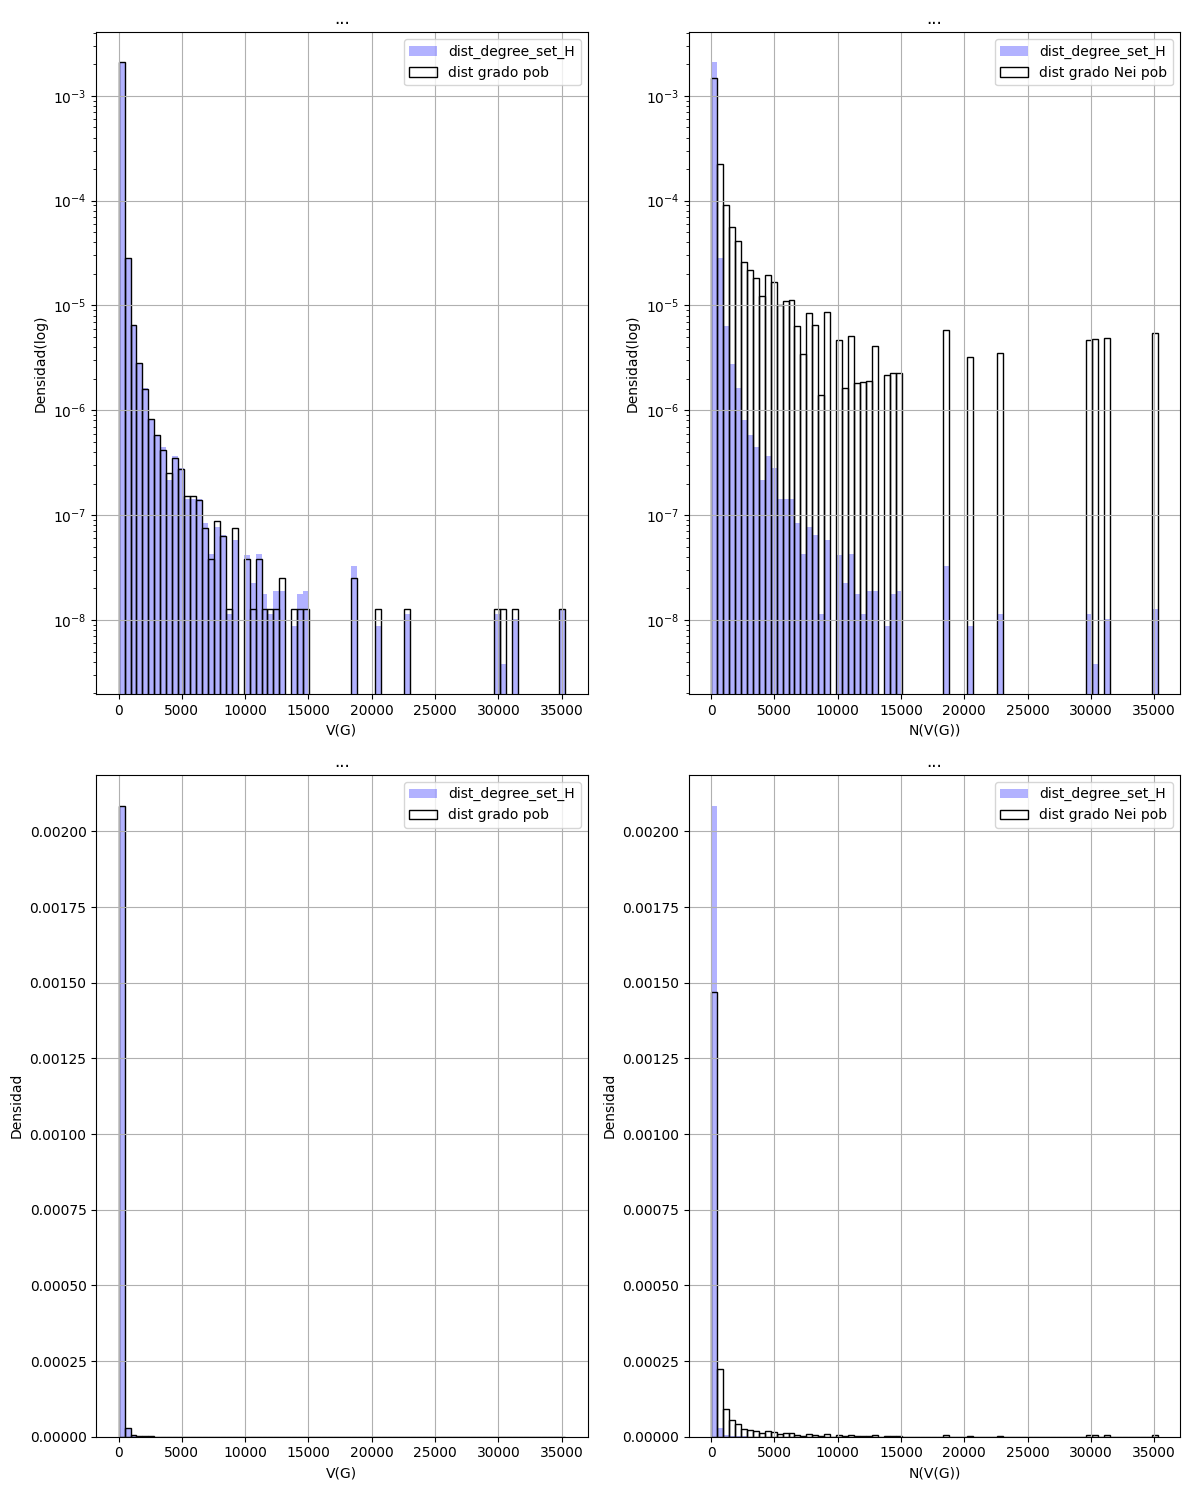

In [75]:
grafica_dist_grado_H_vs_pob(dist_degree_pob,dist_Nei_pob,dic_grados_G,lista_degree_sample_all)

# caso muestreo 5

In [85]:
keys_sample="tipo_muestreo5porc_nodos0.1"

#def all_degree_sample(tipo_sample,porc_sample,dic_grados_G):
lista_degree_nei_sample_all=[]

for i in range(0,10):
    # cargar el sample i
    #i=10
    name="datos_muestra/muestras_grafo_twitch/id_"+str(i)+"_subset_nodos"

    file_1 = open(name, 'rb')
    dic_lista_infec_y_sample= pickle.load(file_1)
    file_1.close()
    muestra=dic_lista_infec_y_sample[keys_sample]
    
    nei_muestra=[]
    for xi in muestra:
        nei_muestra.extend(list(G.neighbors(xi)))

    sample_degree=list(G.degree( nei_muestra))
    for i in range(len(sample_degree)):
        lista_degree_nei_sample_all.append(sample_degree[i][1])


#return lista_degree_sample_all
#sample_degree



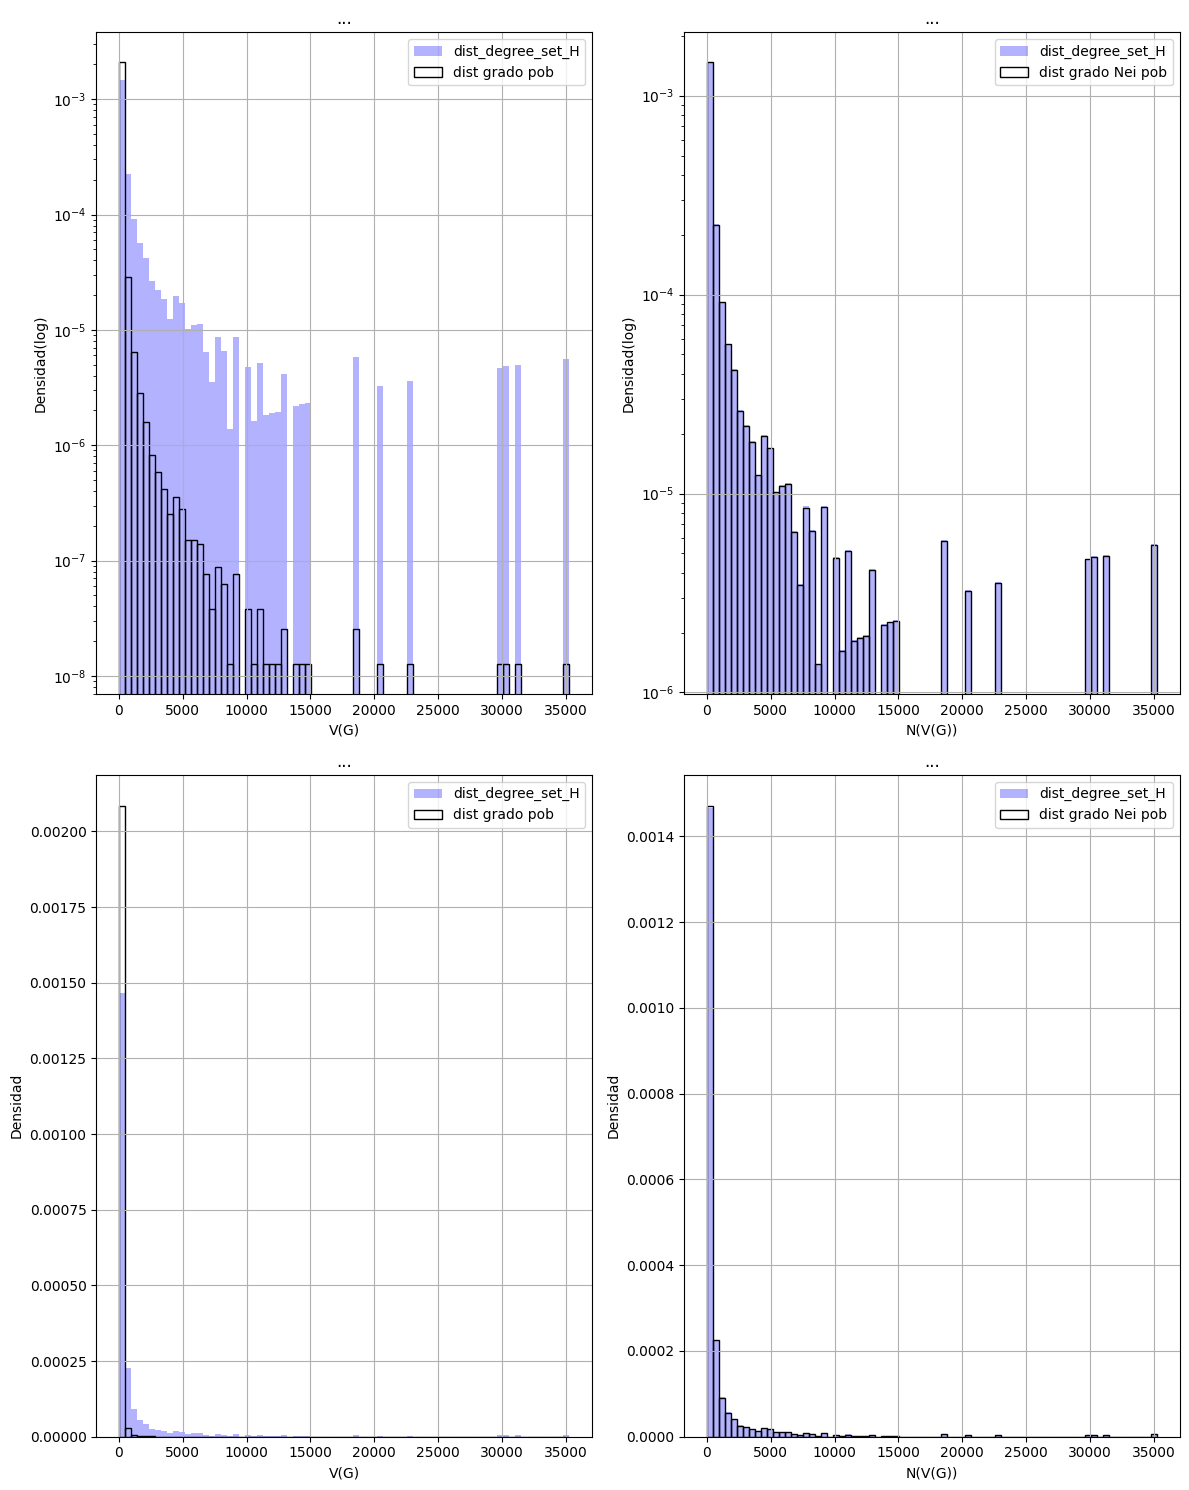

In [86]:
grafica_dist_grado_H_vs_pob(dist_degree_pob,dist_Nei_pob,dic_grados_G,lista_degree_nei_sample_all)

# caso muestreo 6

In [21]:
import random

# Crear una lista de elementos
secuencia = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Tomar una muestra de tamaño 5 sin repeticiones




keys_sample="tipo_muestreo6porc_nodos0.1"

#def all_degree_sample(tipo_sample,porc_sample,dic_grados_G):
lista_degree_nei_sample_all=[]

# for i in range(0,1): se demora 4 min
for i in range(0,8):  # Con 10 sample sobrepasa la memoria ram, # 5 samples son el limite # se demora mas de 13 min
    # cargar el sample i
    #i=10
    name="datos_muestra/muestras_grafo_twitch/id_"+str(i)+"_subset_nodos"

    file_1 = open(name, 'rb')
    dic_lista_infec_y_sample= pickle.load(file_1)
    file_1.close()
    muestra=dic_lista_infec_y_sample[keys_sample]
    
    nei_muestra=[]
    for xi in muestra:
        sample_nei=list(G.neighbors(xi))
        muestra_parcial = random.sample(sample_nei, int(len(sample_nei)*0.1))
        nei_muestra.extend(muestra_parcial)

    sample_degree=list(G.degree( nei_muestra))
    for i in range(len(sample_degree)):
        lista_degree_nei_sample_all.append(sample_degree[i][1])


#return lista_degree_sample_all
#sample_degree



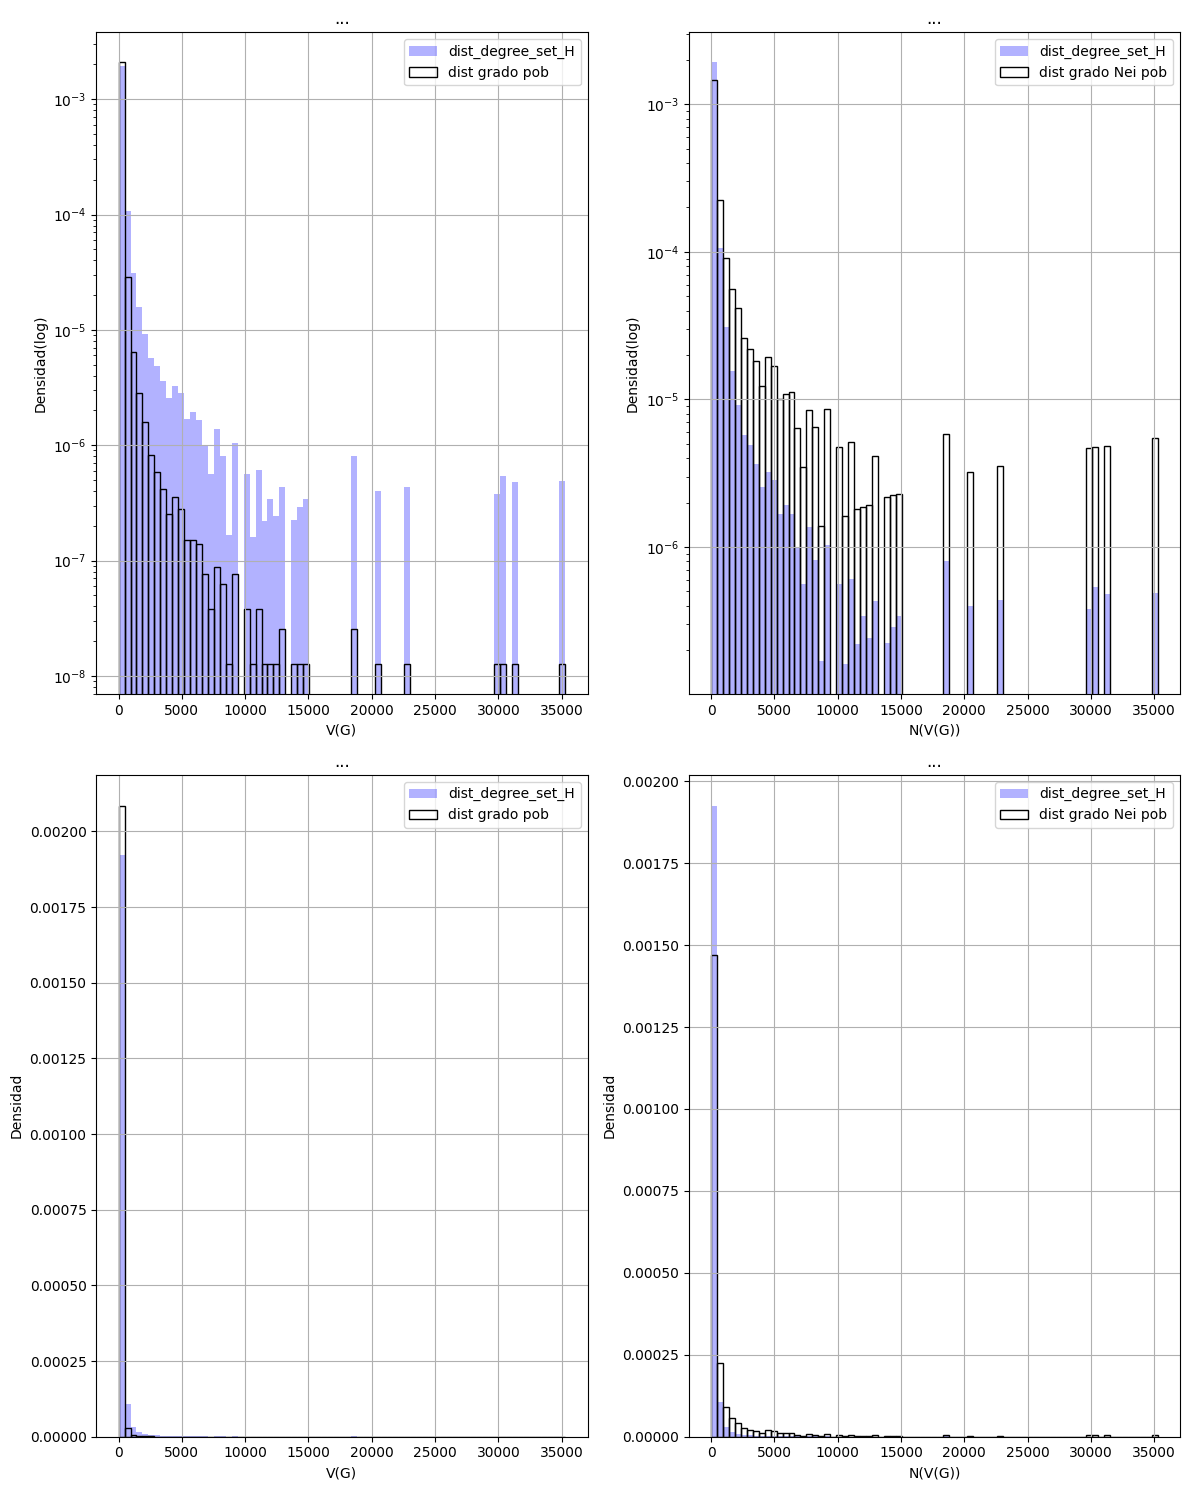

In [23]:
#len(lista_degree_nei_sample_all)
# 22109585
# 17681925
grafica_dist_grado_H_vs_pob(dist_degree_pob,dist_Nei_pob,dic_grados_G,lista_degree_nei_sample_all)

# caso muestreo 7

In [12]:
keys_sample="tipo_muestreo7porc_nodos0.1"

#def all_degree_sample(tipo_sample,porc_sample,dic_grados_G):
lista_degree_nei_sample_all=[]

# for i in range(0,1): se demora 4 min
for i in range(0,1):  # Con 10 sample sobrepasa la memoria ram, # 5 samples son el limite # se demora mas de 13 min
    # cargar el sample i
    #i=10
    name="datos_muestra/muestras_grafo_twitch/id_"+str(i)+"_subset_nodos"

    file_1 = open(name, 'rb')
    dic_lista_infec_y_sample= pickle.load(file_1)
    file_1.close()
    muestra=dic_lista_infec_y_sample[keys_sample]
    
    nei_muestra=[]
    for xi in muestra:
        nei_muestra.extend(list(G.neighbors(xi)))

    sample_degree=list(G.degree( nei_muestra))
    for i in range(len(sample_degree)):
        lista_degree_nei_sample_all.append(sample_degree[i][1])


#return lista_degree_sample_all
#sample_degree



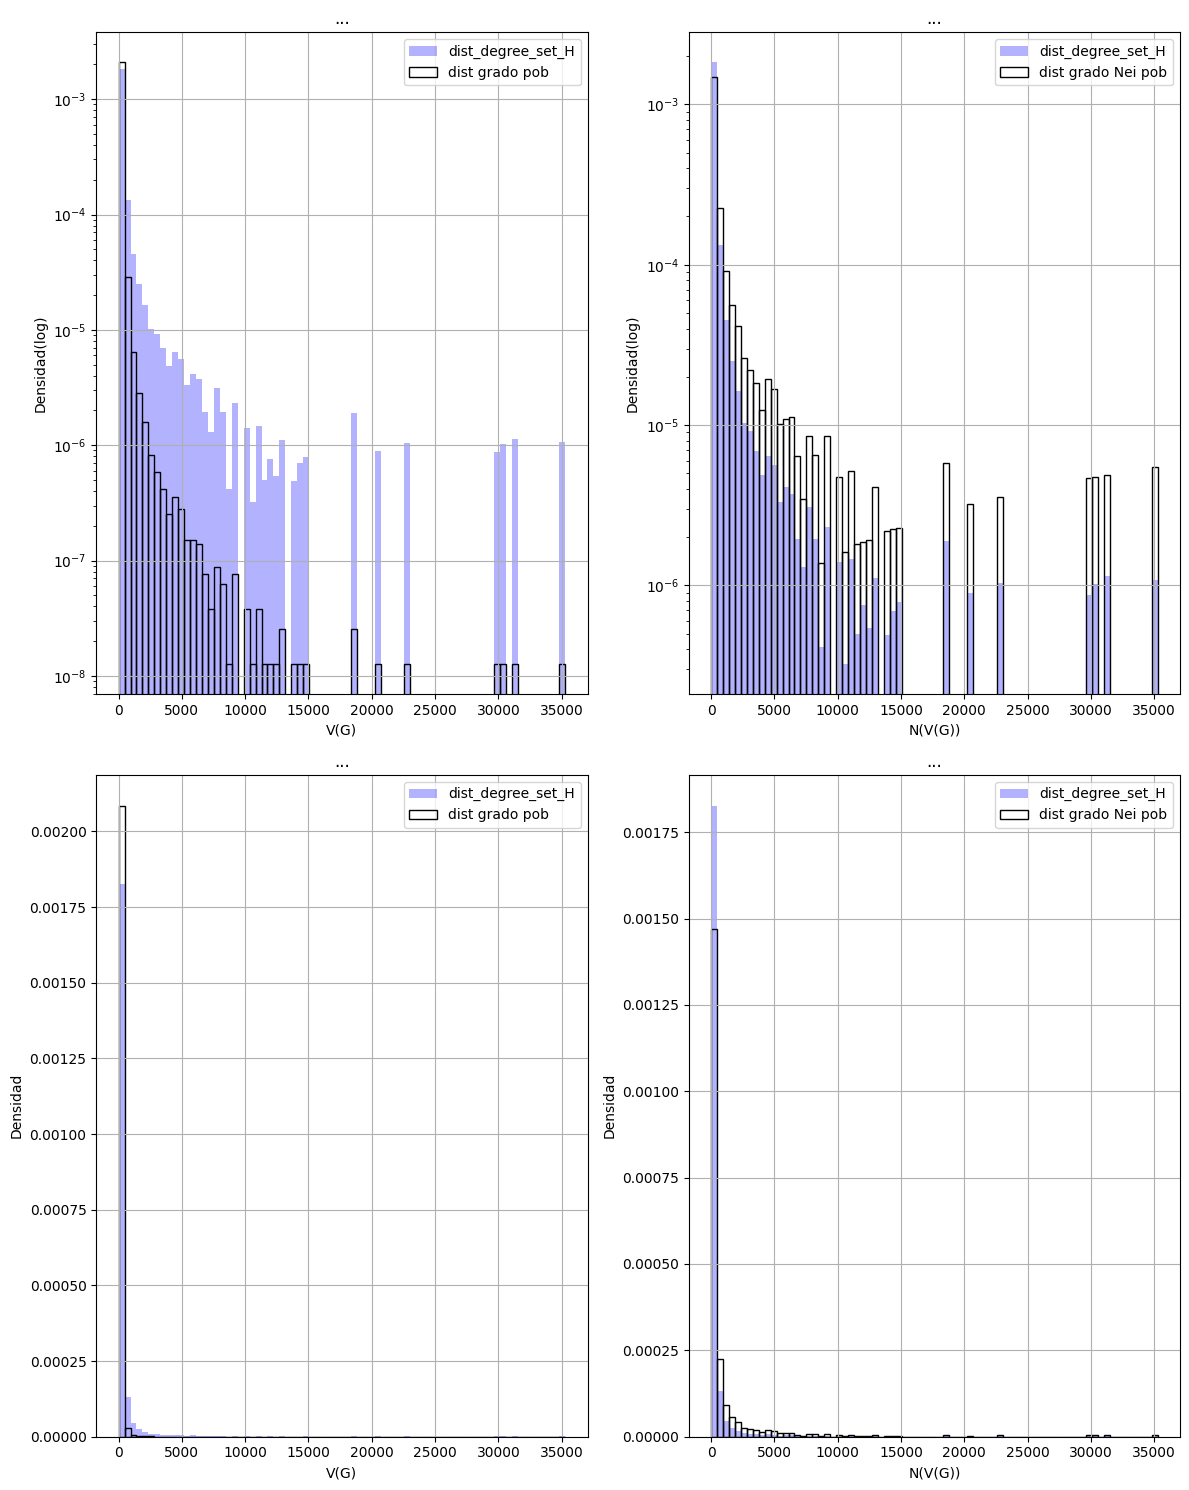

In [13]:
grafica_dist_grado_H_vs_pob(dist_degree_pob,dist_Nei_pob,dic_grados_G,lista_degree_nei_sample_all)

# caso muestreo 8

In [14]:
keys_sample="tipo_muestreo8porc_nodos0.1"

#def all_degree_sample(tipo_sample,porc_sample,dic_grados_G):
lista_degree_nei_sample_all=[]

# for i in range(0,1): se demora 4 min
for i in range(0,1):  # Con 10 sample sobrepasa la memoria ram, # 5 samples son el limite # se demora mas de 13 min
    # cargar el sample i
    #i=10
    name="datos_muestra/muestras_grafo_twitch/id_"+str(i)+"_subset_nodos"

    file_1 = open(name, 'rb')
    dic_lista_infec_y_sample= pickle.load(file_1)
    file_1.close()
    muestra=dic_lista_infec_y_sample[keys_sample]
    
    nei_muestra=[]
    for xi in muestra:
        nei_muestra.extend(list(G.neighbors(xi)))

    sample_degree=list(G.degree( nei_muestra))
    for i in range(len(sample_degree)):
        lista_degree_nei_sample_all.append(sample_degree[i][1])


#return lista_degree_sample_all
#sample_degree



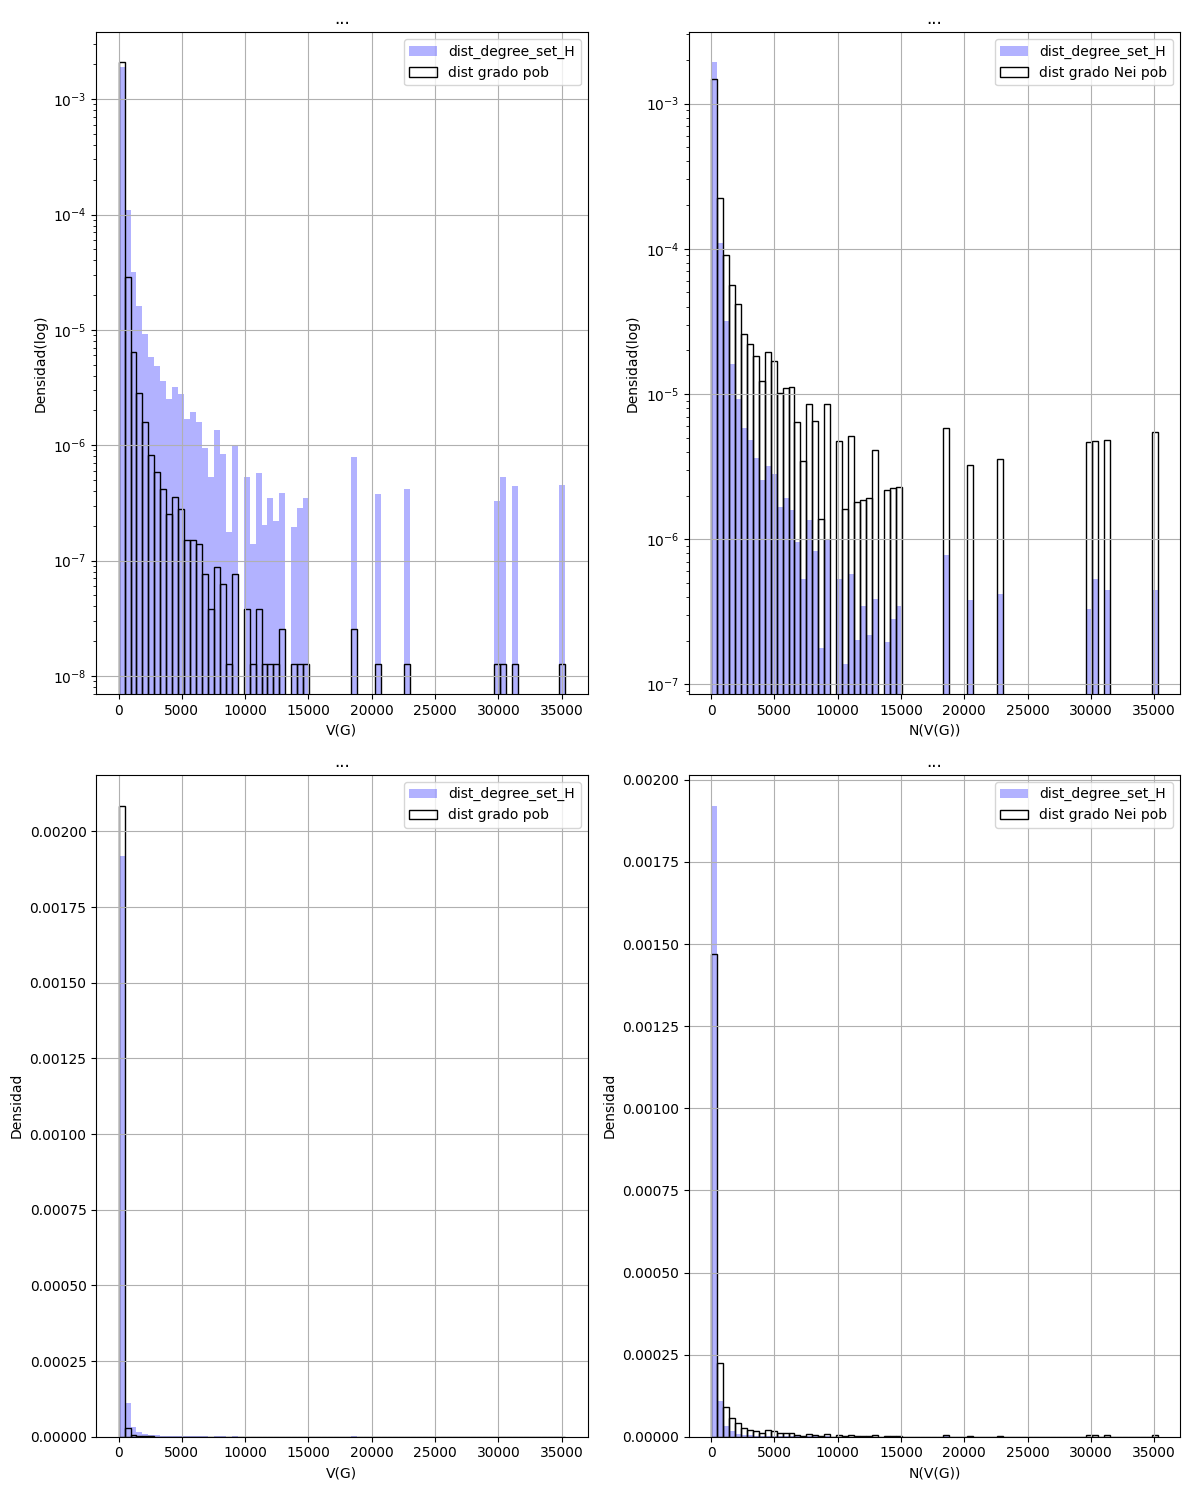

In [15]:
grafica_dist_grado_H_vs_pob(dist_degree_pob,dist_Nei_pob,dic_grados_G,lista_degree_nei_sample_all)